In [1]:
%load_ext autoreload
%autoreload 2
from lib.feature_extractor import NASNetLargeExtractor
from lib.hyper_search import RandomSearch
# load cifar datasets
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# download google nasnet large pre-trained model
model = NASNetLargeExtractor(32, 10, model_path="models/cifar10", data_path="datasets/cifar10")

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

def preprocess_data(data_set):
    data_set /= 255.0
    return data_set

x_train = preprocess_data(x_train)
x_test = preprocess_data(x_test)

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# split a validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
# extract features
features_train = model.extract(x_train[:50])
print(features_train.shape)

Extracting features...
1/1 [==============================] - 0s 2ms/step
(50, 4032)


In [5]:
# save features
model.save_features()

Extracted training set features saved


In [6]:
# load features
model.load_features()

Extracted training set features loaded


In [7]:
# use dense layer to test feature quality
history = model.train_classifier(y_train[:50, :], epochs=2, batch_size=5, validation_data=(x_valid[:18], y_valid[:18,:]))

Extracting features for validation data
4/4 [==============================] - 6s 2s/step
Epoch 1/2
10/10 [==============================] - 0s 28ms/step - loss: 28.7494 - accuracy: 0.2800 - val_loss: 27.4185 - val_accuracy: 0.5556
Epoch 2/2
10/10 [==============================] - 0s 6ms/step - loss: 25.5908 - accuracy: 0.9000 - val_loss: 26.4831 - val_accuracy: 0.3333
Restoring best model weights with validation accuracy: 0.6666666865348816


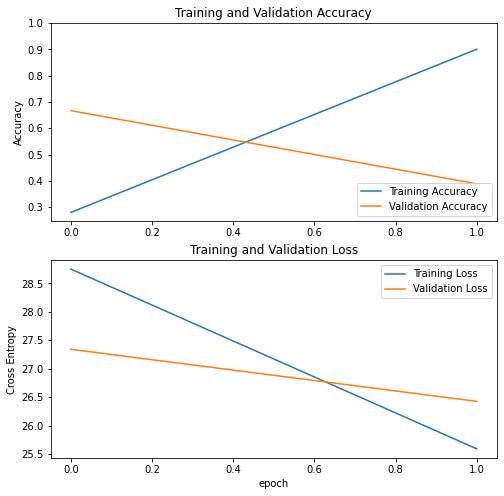

In [8]:
acc = history['acc']
val_acc = history["val_acc"]

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [9]:
model.save_classifier()
model.save_extractor()

Classifier saved
Extractor saved


In [10]:
model.load_classifier()
model.load_extractor()

Classifier loaded
Extractor loaded


In [11]:
# fine-tune the network
history = model.fine_tune_features(x_train[:50], y_train[:50, :], batch_size=5, epochs=2, validation_data=(x_valid[:18], y_valid[:18,:]), early_stop=True)
features = model.extract(x_train[:50], compression=True)

Classifier loaded
Extractor loaded
Epoch 1/2
10/10 [==============================] - 97s 10s/step - loss: 28.8753 - accuracy: 0.4200 - val_loss: 28.6344 - val_accuracy: 0.5000
Epoch 2/2
10/10 [=================

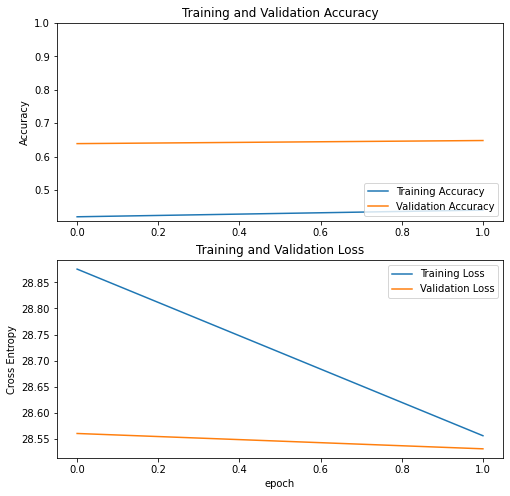

In [12]:
acc = history['acc']
val_acc = history["val_acc"]

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
model.save_features()
model.load_features()

Extracted training set features saved
Extracted validation set features saved
Compressed training set features saved
Extracted training set features loaded
Extracted validation set loaded
Compressed training set features loaded


In [19]:
model.save_classifier()
model.save_extractor()

Classifier saved
Extractor saved


In [20]:
model = NASNetLargeExtractor(32, 10, model_path="models/cifar10", data_path="datasets/cifar10")
model.load_classifier()
model.load_extractor()

Classifier loaded
Extractor loaded


In [4]:
# search hyper parameters
rds = RandomSearch(model)
best_dict, history_dict = rds(x_train[:50], y_train[:50], validation_data=(x_valid[:18], y_valid[:18]))

Evaluating hyper parameters: learning_rate = 0.0374219910805207, weight_decay = 5.137994252007877e-05
Classifier loaded
Extractor loaded
1/1 [==============================] - 16s 16s/step - loss: 28.4697 - accuracy: 0.4800 - val_loss: 27.5382 - val_accuracy: 0.6667
Restoring best model weights with validation accuracy: 0.6666666865348816
Compressing features...
1/1 [==============================] - 0s 1ms/step
Evaluating hyper parameters: learning_rate = 0.0374219910805207, weight_decay = 0.000550349435509747
Classifier loaded
Extractor loaded
1/1 [==============================] - 18s 18s/step - loss: 28.3906 - accuracy: 0.6200 - val_loss: 27.7441 - val_accuracy: 0.7222
Restoring best model weights with validation accuracy: 0.7222222089767456
Compressing features...
1/1 [==============================] - 0s 3ms/step
Evaluating hyper pa

({'learning_rate': 0.0374219910805207,
  'weight_decay': 5.137994252007877e-05,
  'accuracy': 0,
  'loss': inf},
 {0: {'learning_rate': 0.0374219910805207,
   'weight_decay': 5.137994252007877e-05,
   'history': {'val_loss': [27.538183212280273],
    'val_acc': [0.6666666865348816],
    'acc': [0.47999998927116394],
    'loss': [28.469741821289062]}},
  1: {'learning_rate': 0.0374219910805207,
   'weight_decay': 0.000550349435509747,
   'history': {'val_loss': [27.744062423706055],
    'val_acc': [0.7222222089767456],
    'acc': [0.6200000047683716],
    'loss': [28.390602111816406]}},
  2: {'learning_rate': 0.022073964175721952,
   'weight_decay': 5.137994252007877e-05,
   'history': {'val_loss': [27.982755661010742],
    'val_acc': [0.6666666865348816],
    'acc': [0.6000000238418579],
    'loss': [28.352703094482422]}},
  3: {'learning_rate': 0.022073964175721952,
   'weight_decay': 0.000550349435509747,
   'history': {'val_loss': [27.858211517333984],
    'val_acc': [0.722222208976